In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fake_job_postings.csv to fake_job_postings.csv


Decision Tree Accuracy: 0.9661633109619687
Random Forest Accuracy: 0.9807046979865772

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.99      0.61      0.75       173

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576



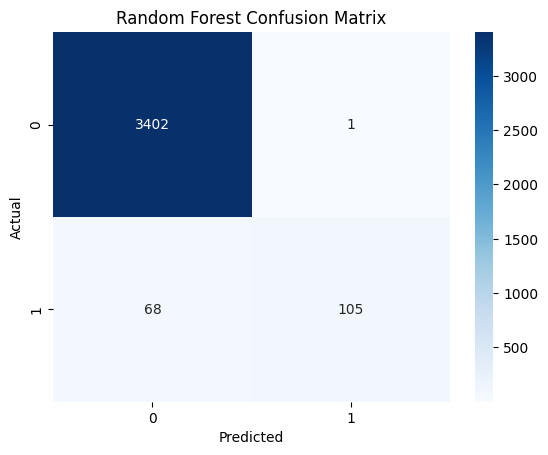

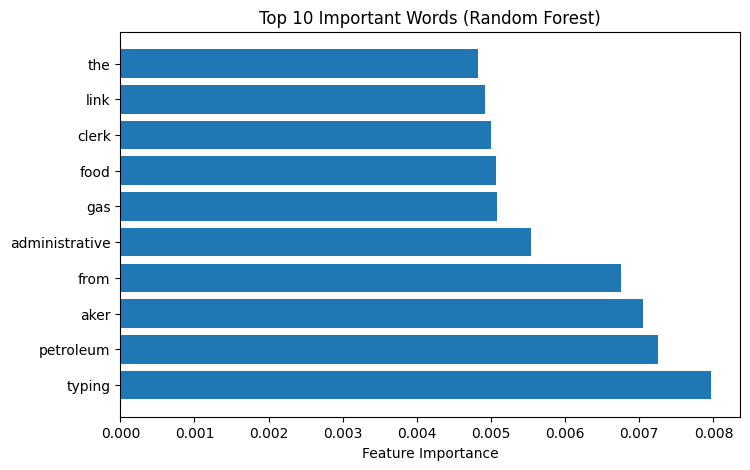

In [ ]:
# Day 6: Decision Tree & Random Forest Models

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

# Load preprocessed dataset

df = pd.read_csv('fake_job_postings.csv')

df = df.dropna(subset=['description'])

# TF-IDF Vectorization

vectorizer = TfidfVectorizer(max_features=3000)

X = vectorizer.fit_transform(df['description'])

y = df['fraudulent']

# Split data

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=42, stratify=y

)

# 1️⃣ Decision Tree

dt = DecisionTreeClassifier(max_depth=20, random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# 2️⃣ Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")

print(classification_report(y_test, y_pred_rf))

# Confusion matrix visualization

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Random Forest Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()

# Feature Importance

importances = rf.feature_importances_

indices = importances.argsort()[-10:][::-1]

feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(8,5))

plt.barh(range(len(indices)), importances[indices], align='center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.title("Top 10 Important Words (Random Forest)")

plt.xlabel("Feature Importance")

plt.show()




📊 Model Comparison:

                              Model  Accuracy  Precision   Recall  F1-Score
0               Logistic Regression  0.955000   1.000000  0.15625  0.270270
1      Decision Tree (max_depth=10)  0.950000   0.550000  0.34375  0.423077
2      Decision Tree (max_depth=20)  0.948333   0.526316  0.31250  0.392157
3   Random Forest (n_estimators=50)  0.963333   1.000000  0.31250  0.476190
4  Random Forest (n_estimators=100)  0.963333   1.000000  0.31250  0.476190


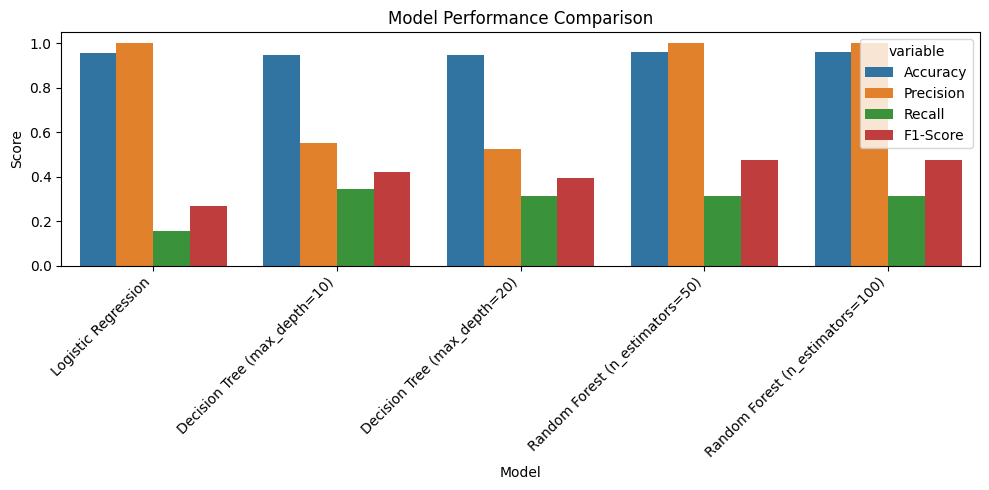

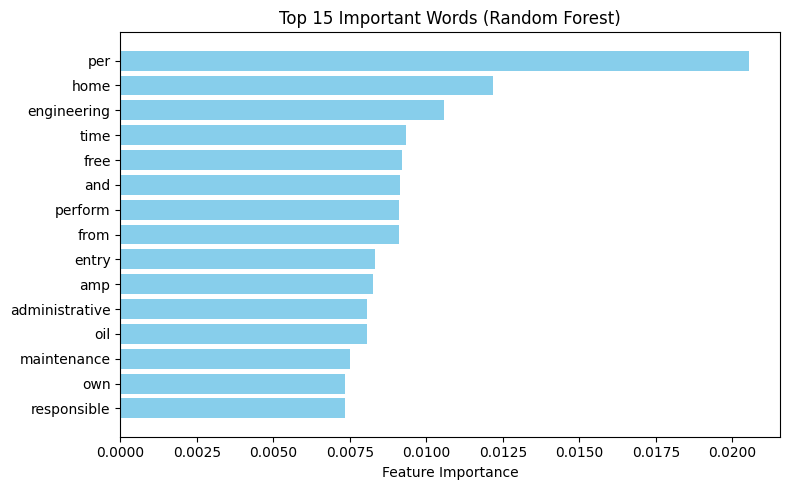


💡 Top 15 Important Words:
per → 0.02053
home → 0.01217
engineering → 0.01056
time → 0.00932
free → 0.00919
and → 0.00913
perform → 0.00912
from → 0.00910
entry → 0.00831
amp → 0.00825
administrative → 0.00807
oil → 0.00805
maintenance → 0.00749
own → 0.00735
responsible → 0.00733


In [ ]:
# ---------------------------------------------
# ✅ FAST VERSION: Model Comparison + Feature Importance
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---------------------------------------------
# Load dataset (with smaller sample to speed up)
# ---------------------------------------------
df = pd.read_csv('fake_job_postings.csv')

# Keep only needed columns
df = df.dropna(subset=['description'])
df = df.sample(3000, random_state=42)   # 🔹 Use only 3000 rows for speed

# TF-IDF Vectorization (reduce feature count too)
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------
# Task 1️⃣ Model Comparison
# ---------------------------------------------
results = []

# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results.append([
    'Logistic Regression',
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
])

# Decision Tree (only 2 depths for faster run)
for depth in [10, 20]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    results.append([
        f'Decision Tree (max_depth={depth})',
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt)
    ])

# Random Forest (fewer trees for speed)
for n in [50, 100]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    results.append([
        f'Random Forest (n_estimators={n})',
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ])

# Show table
metrics_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n📊 Model Comparison:\n")
print(metrics_df)

# ---------------------------------------------
# Plot comparison
# ---------------------------------------------
plt.figure(figsize=(10,5))
sns.barplot(
    data=metrics_df.melt(id_vars='Model', value_vars=['Accuracy','Precision','Recall','F1-Score']),
    x='Model', y='value', hue='variable'
)
plt.xticks(rotation=45, ha='right')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Task 2️⃣ Feature Importance (Random Forest)
# ---------------------------------------------
best_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

importances = best_rf.feature_importances_
indices = np.argsort(importances)[-15:][::-1]
feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Words (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

# Display important words
print("\n💡 Top 15 Important Words:")
for i in indices:
    print(f"{feature_names[i]} → {importances[i]:.5f}")


In [1]:
# Day 7: Model Evaluation & Hyperparameter Tuning

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description'])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
log_reg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(random_state=42)

# 1️⃣ Cross-validation (5-fold)
log_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", log_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())

# 2️⃣ Fit models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 3️⃣ ROC-AUC Comparison
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_prob_log)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,5))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Random Forest")
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_log))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

# 4️⃣ Hyperparameter tuning (GridSearchCV on Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
}
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

FileNotFoundError: [Errno 2] No such file or directory: 'fake_job_postings.csv'

In [ ]:
# Day 7: Model Evaluation & Hyperparameter Tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ================================
# Load and Prepare Data
# ================================
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description'])

vectorizer = TfidfVectorizer(max_features=2500, stop_words='english')
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ================================
# Initialize Models
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ================================
# Task 1: Cross-Validation (5-fold)
# ================================
cv_results = {}

print("🔹 Performing 5-Fold Cross-Validation...\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }
    print(f"{name}: Mean={np.mean(scores):.4f}, Std={np.std(scores):.4f}")

# Convert results to DataFrame for plotting
cv_df = pd.DataFrame(cv_results).T

# Plot mean CV accuracies
plt.figure(figsize=(8, 5))
plt.bar(cv_df.index, cv_df["Mean Accuracy"], color=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Cross-Validation Mean Accuracy (5-Fold)")
plt.ylabel("Accuracy")
plt.show()

print("\nModel Stability (lower Std Dev = more stable):")
print(cv_df)

# ================================
# Task 2: ROC-AUC Visualization
# ================================
print("\n🔹 Training models for ROC-AUC comparison...\n")
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Compute AUC scores
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"{name} AUC Score: {auc_score:.4f}")

# ================================
# Task 3: Hyperparameter Tuning (Decision Tree)
# ================================
print("\n🔹 Hyperparameter Tuning using GridSearchCV (Decision Tree)...\n")

param_grid = {
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)

# Compare tuned Decision Tree vs Random Forest
rf = models["Random Forest"]
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = np.mean(cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy'))

best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)
dt_acc = np.mean(cross_val_score(best_dt, X_train, y_train, cv=3, scoring='accuracy'))

print(f"\nTuned Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# ================================
# Interpretation
# ================================
print("""
📊 Interpretation:
- Cross-validation shows which model is most stable (lowest variance).
- ROC-AUC curve demonstrates which classifier separates fake vs real jobs best.
- GridSearchCV improves Decision Tree by finding the best depth, split rules, and criteria.
- Random Forest typically still performs better, but tuning makes Decision Tree more competitive.
""")


In [ ]:
# Day 8: Saving Model and Vectorizer

import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load preprocessed data
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description'])

# Train model quickly (TF-IDF + Logistic Regression)
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save model and vectorizer
joblib.dump(model, 'fake_job_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Model and Vectorizer Saved Successfully!")

In [ ]:
import joblib

# Load saved files

model = joblib.load('fake_job_model.pkl')

vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example inference

test_jobs = [

    "Work from home with high pay, no experience required! Apply immediately!",

    "We are hiring a software engineer with 2+ years of Python experience."

]

X_test_jobs = vectorizer.transform(test_jobs)

predictions = model.predict(X_test_jobs)

for job, pred in zip(test_jobs, predictions):

    label = "Fake Job" if pred == 1 else "Real Job"

    print(f"\nJob: {job}\nPrediction: {label}")




In [ ]:
# Save as app.py

from flask import Flask, request, jsonify

import joblib

app = Flask(__name__)

# Load model and vectorizer

model = joblib.load('fake_job_model.pkl')

vectorizer = joblib.load('tfidf_vectorizer.pkl')

@app.route('/')

def home():

    return "Fake Job Detection API is running!"

@app.route('/predict', methods=['POST'])

def predict():

    data = request.get_json()

    job_text = data.get('description', '')

    if not job_text:

        return jsonify({"error": "No job description provided"}), 400

    # Transform and predict

    X_input = vectorizer.transform([job_text])

    prediction = model.predict(X_input)[0]

    label = "Fake Job" if prediction == 1 else "Real Job"

    return jsonify({

        "prediction": label

    })

if __name__ == '__main__':

    app.run(debug=True)

